In [1]:
import os, sys
import matplotlib
import pandas as pd
import numpy as np
from PIL import Image, ImageStat, ImageChops

In [2]:
%matplotlib inline

In [3]:
img_dir = os.path.join(os.getcwd(), 'data/subsets/train_1/')

In [4]:
img_list = os.listdir(img_dir)

In [5]:
def get_image_stats(img_path):
    try:
        img = Image.open(img_path)
        result = ImageStat.Stat(img)
        img.close()
    except OSError:
        return None
    return result

In [6]:
img_stats = [get_image_stats(os.path.join(img_dir, i)) for i in img_list]

/home/serpens/opt/anaconda3/lib/python3.5/site-packages/PIL/Image.py:2238: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [7]:
len([i for i in img_stats if i is None])

1

In [8]:
def get_stat_list(img_stat):
    return img_stat.count + sum(map(list, img_stat.extrema), []) + img_stat.sum + img_stat.mean + img_stat.median + img_stat.rms + img_stat.var + img_stat.stddev

In [9]:
stat_df = []
for i in zip(img_list, img_stats):
    if i[1] is not None:
        stat_df.append([i[0]] + get_stat_list(i[1]))

In [10]:
stat_df = pd.DataFrame(stat_df)

In [11]:
artists = pd.read_csv('data/train_info.csv')
artists = artists[['filename', 'artist']]

In [12]:
data = pd.merge(stat_df, artists, left_on=0, right_on='filename', how='left')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e09bde048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3e072a9048>]], dtype=object)

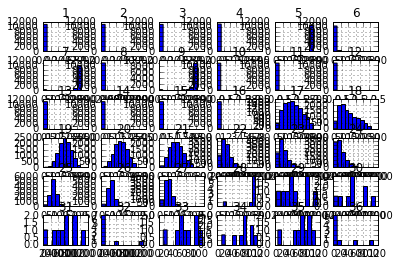

In [13]:
data.hist()

In [14]:
len(set(data['artist']))

1436

In [15]:
def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = matplotlib.colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = matplotlib.cm.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

In [16]:
cmap_f = get_cmap(1436)
numbered_artists = dict((i[1], i[0]) for i in enumerate(set(data['artist'])))
cmap = [cmap_f(numbered_artists[i]) for i in data['artist']]

In [17]:
#pd.tools.plotting.scatter_matrix(data.iloc[:,1:10], figsize=(20, 20), diagonal='kde', c=cmap)

In [18]:
#pd.tools.plotting.scatter_matrix(data.iloc[:,10:20], figsize=(20, 20), diagonal='kde', c=cmap)

In [19]:
#pd.tools.plotting.scatter_matrix(data.iloc[:,20:30], figsize=(20, 20), diagonal='kde', c=cmap)

In [20]:
#pd.tools.plotting.scatter_matrix(data.iloc[:,30:], figsize=(20, 20), diagonal='kde', c=cmap)

In [21]:
important_data = data.iloc[:, list(range(5, 10)) + list(range(17, 28))]

In [22]:
selected_artists = list(set(data['artist']))[:10]

In [23]:
selected_rows = [i[0] for i in enumerate(data['artist']) if i[1] in selected_artists]
len(selected_rows)

99

In [24]:
important_data = important_data.iloc[selected_rows, :]

In [25]:
important_data

,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27
73,255.0,0,255.0,0.0,255.0,79.0,82.0,92.720592,104.731910,107.167394,1840.638023,2679.527359,2971.142305,42.902658,51.764151,54.508186
348,248.0,23,243.0,28.0,223.0,168.0,150.0,159.143748,150.313091,135.654110,2409.605719,2236.420887,1610.604799,49.087735,47.290812,40.132341
364,255.0,0,255.0,0.0,255.0,115.0,93.0,124.626010,122.014538,107.467380,2541.858206,2748.126487,2611.205194,50.416844,52.422576,51.099953
780,255.0,0,255.0,0.0,255.0,190.0,199.0,172.768652,174.053137,177.534783,4289.851873,4524.353821,4881.792110,65.496961,67.263317,69.869823
923,255.0,20,251.0,0.0,255.0,87.0,88.0,105.948547,112.653110,115.874433,2587.691169,2740.134571,2915.635636,50.869354,52.346295,53.996626
1265,255.0,0,243.0,0.0,240.0,57.0,56.0,81.671057,72.592029,68.888941,1945.178418,1264.197025,1044.211940,44.104177,35.555548,32.314268
1595,255.0,0,255.0,0.0,255.0,153.0,138.0,174.186728,157.075094,140.043798,5397.244168,6222.106142,5239.628620,73.465939,78.880328,72.385279
1741,255.0,0,255.0,0.0,249.0,103.0,71.0,158.875585,122.821131,84.642710,4507.179448,3067.527814,1036.002758,67.135530,55.385267,32.186997
1979,255.0,11,255.0,1.0,255.0,75.0,53.0,132.040265,118.202287,99.112276,4976.934567,4704.824901,4006.611301,70.547392,68.591726,63.297799
2054,255.0,0,255.0,0.0,235.0,53.0,34.0,110.790426,81.960010,48.654413,3236.075276,2164.180045,648.396440,56.886512,46.520749,25.463630


In [27]:
pd.tools.plotting.scatter_matrix(important_data, figsize=(200, 200), diagonal='kde', c=cmap)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3df1506668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3de5806c50>]], dtype=object)